In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from skimage import io


#1 задание

In [2]:
img_link = "https://raw.githubusercontent.com/mosolab/DIP/9c1631356b62d803f098cef30d2fe959383608b7/examples/digit.jpg"
img_raw = io.imread(img_link)

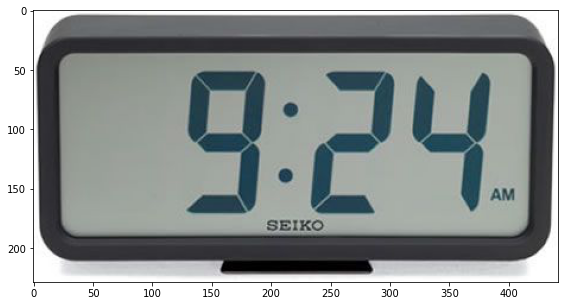

In [3]:
plt.figure(figsize=(10,5))
im = plt.imshow(img_raw)

#2 задание

In [ ]:
img_link = "https://raw.githubusercontent.com/mosolab/DIP/9c1631356b62d803f098cef30d2fe959383608b7/examples/basketball.jpg"
img_raw = io.imread(img_link)

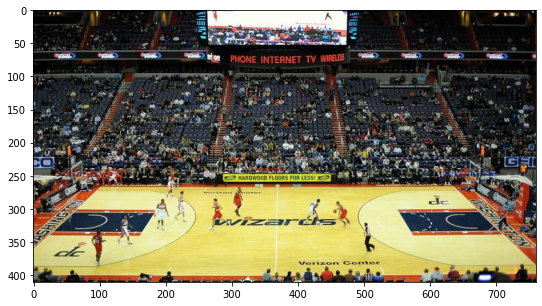

In [ ]:
plt.figure(figsize=(10,5))
im = plt.imshow(img_raw)

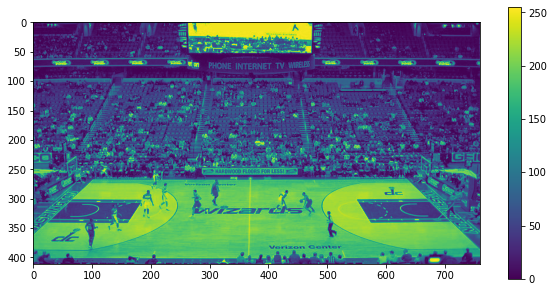

In [ ]:
img_gray = cv2.cvtColor(img_raw, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10,5))
im = plt.imshow(img_gray)
plt.colorbar(im)

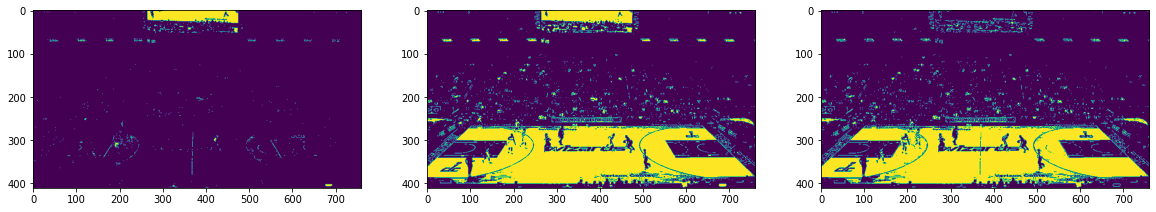

In [ ]:
_,th_up = cv2.threshold(img_gray,230,255,cv2.THRESH_BINARY)
_,th_down = cv2.threshold(img_gray,170,255,cv2.THRESH_BINARY)

mask = th_down-th_up

plt.figure(figsize=(20,5))

plt.subplot(131)
plt.imshow(th_up)
plt.subplot(132)
plt.imshow(th_down)
plt.subplot(133)
plt.imshow(mask)

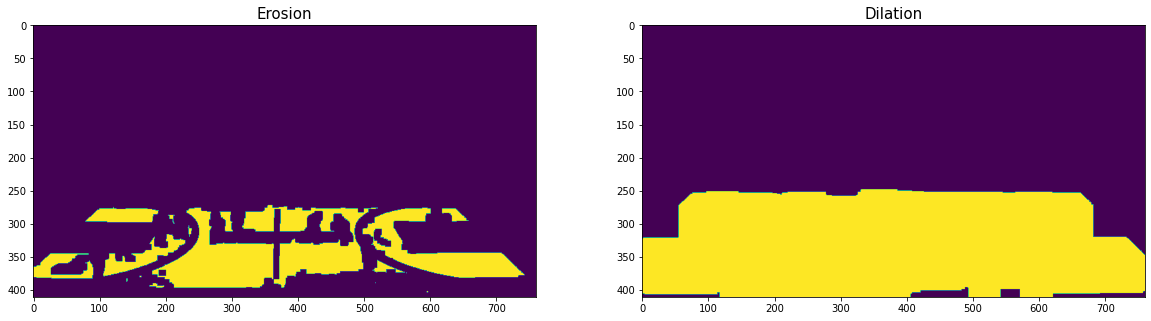

In [ ]:
kernel = np.ones((5,5),"uint8")

erode = cv2.erode(mask,kernel,iterations=2)
dilate = cv2.dilate(erode,kernel,iterations=12)


plt.figure(figsize=(20,5))


plt.subplot(121)
plt.title("Erosion",fontsize = 15)
plt.imshow(erode)

plt.subplot(122)
plt.title("Dilation",fontsize = 15)
plt.imshow(dilate)

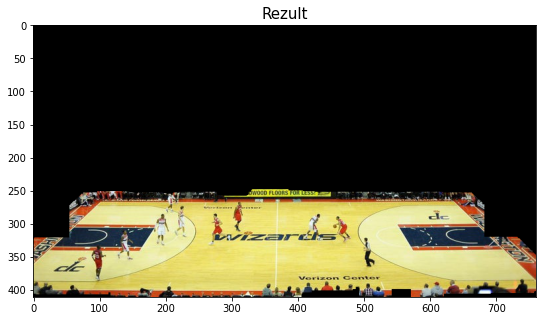

In [ ]:
rez = cv2.bitwise_and(img_raw, img_raw, mask = dilate)


plt.figure(figsize=(10,5))
plt.title("Rezult",fontsize = 15)
plt.imshow(rez)

#дополнительно

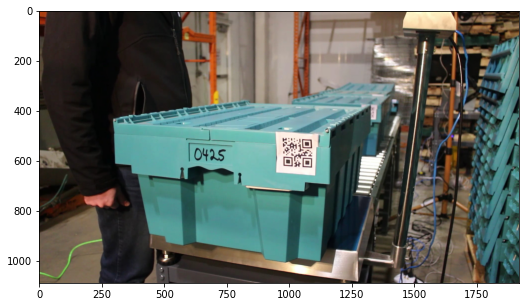

In [ ]:
img_link = "https://github.com/mosolab/DIP/raw/9c1631356b62d803f098cef30d2fe959383608b7/examples/frame1.jpg"
img_raw = io.imread(img_link)

plt.figure(figsize=(10,5))
im = plt.imshow(img_raw)

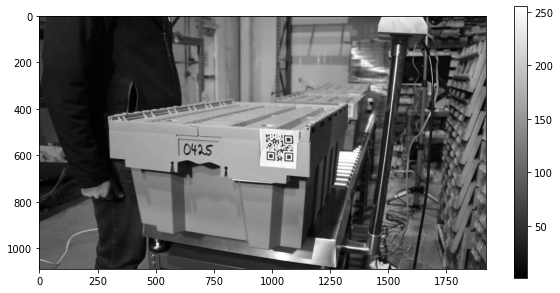

In [ ]:
img_gray = cv2.cvtColor(img_raw, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10,5))
im = plt.imshow(img_gray,cmap="gray")
plt.colorbar(im)

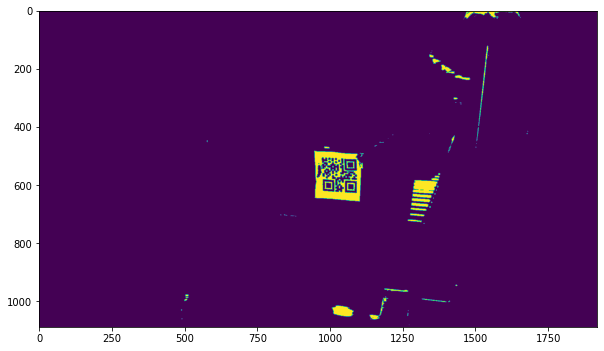

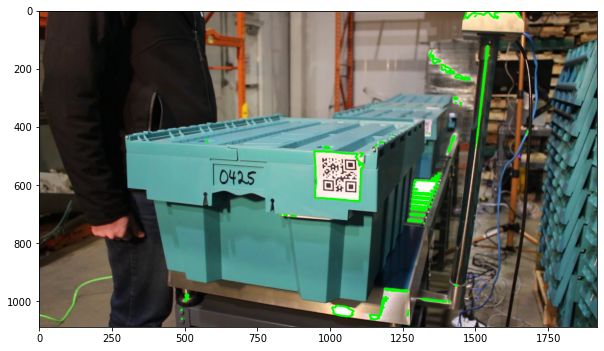

In [ ]:
_,th_border = cv2.threshold(img_gray,230,255,cv2.THRESH_BINARY)


plt.figure(figsize=(10,10))
plt.imshow(th_border)


cntrs,_ = cv2.findContours(th_border, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

img = cv2.drawContours(img_raw.copy(), cntrs, -1, (0,250,0), 5)

plt.figure(figsize=(10,10))
plt.imshow(img)

In [ ]:
def decode_qr(ROI):
  qrDecoder = cv2.QRCodeDetector()
  return qrDecoder.detectAndDecode(ROI)

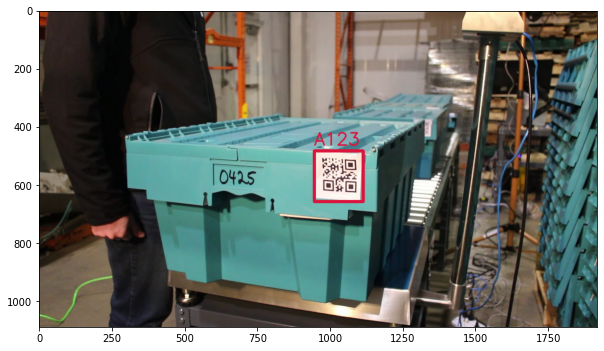

In [ ]:
img = img_raw.copy()

for c in cntrs:
  area = cv2.contourArea(c)

  if area > 4000:
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(img,(x,y), (x + w, y + h),(220,20,60),10)

    ROI = img[y:y+h, x:x+w]
    
    data = decode_qr(ROI)

    cv2.putText(img,data[0],(x,y-20), cv2.FONT_HERSHEY_SIMPLEX, 2,(220,20,60),4,cv2.LINE_AA)

    
plt.figure(figsize=(10,10))
plt.imshow(img)